## a-AlphaBio homework 
### Mark Thompson
### Started April 29, 2024 

In [1]:
%load_ext autoreload

In [2]:
%autoreload
# import libraries
import numpy as np
import pickle as pk
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
import torch
import torch.nn as nn

# Some plotting functions
#
def plot_preds_hist(preds_file_path):
    preds = pk.load(open(preds_file_path, 'rb'))
    print('len(preds):', len(preds))
    preds = [p[0] for p in preds]
    print('preds[0:10]:', preds[0:10])

    # Histogram of predicted values
    plt.hist(preds, bins=100)
    plt.xlabel('pred Kd (nm)')
    plt.ylabel('count')
    plt.title('Distribution of pred values set')
    plt.show()


def plot_pred_vs_true(preds_file_path, true_file_path, xlim=(0,5), ylim=(0,5)):
    preds = pk.load(open(preds_file_path, 'rb'))
    y = pk.load(open(true_file_path, 'rb'))
    print('len(preds):', len(preds), ', len(y):', len(y))
    preds = [p[0] for p in preds]
    y = [a[0] for a in y]

    # scatter plot of true vs pred
    plt.scatter(y, preds, c ="blue")
    plt.xlabel('experimental Kd (nm)')
    plt.ylabel('predicted Kd (nm)')
    plt.title('true vs predicted Kd on validation set')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()



---------
## Holdout dataset and predictions

In [ ]:
# The holdout data
data_file = './data/alphaseq_data_hold_out.csv'
df = pd.read_csv(data_file)
rows1 = df.shape[0]
print('holdout dataframe has', rows1, 'rows')
print(df.columns.tolist())
print(df['sequence_a'].describe())

In [ ]:
# The predictions on the holdout set

# tform_mlp version 1 predictions
data_file = './inference_results/tform_mlp_model/cleaned-4-data/preds_tform_mlp_1715104590.5575511.csv'
df = pd.read_csv(data_file)
rows1 = df.shape[0]
print('holdout predictions has', rows1, 'rows')
print(df.columns.tolist())
print(df.describe())
preds = df['pred_Kd'].values

# tform_mlp_v2 version 2 predictions
data_file = './inference_results/tform_mlp_model_v2/addendum/cleaned-4b-data/preds_tform_mlp_1715280172.2843447.csv'
df = pd.read_csv(data_file)
rows1 = df.shape[0]
print('holdout predictions has', rows1, 'rows')
print(df.columns.tolist())
print(df.describe())
preds_v2 = df['pred_Kd'].values


# Histogram of predicted values
# plt.figure(figsize=(6,6))
# plt.hist(preds, bins=100)
plt.hist(preds, bins=100, alpha=1.0, label='Transformer v1', color='b')
plt.hist(preds_v2, bins=100, alpha=1.0, label='Transformer v2', color='r')
plt.legend(loc='upper left')

plt.xlabel('pred Kd (nm)')
plt.ylabel('count')
plt.title('Distribution of pred Kd values on the holdout set')
plt.xlim((-1,5))
# plt.ylim((0,5))
plt.show()


----
## alphaseq_data_train dataset  (not cleaned)

In [ ]:
# The predictions on the holdout set
data_file = './data/alphaseq_data_train.csv'
df = pd.read_csv(data_file)
rows1 = df.shape[0]
print('dataset has', rows1, 'rows')
print(df.columns.tolist())
print(df.describe())

raw_Kds = df['Kd'].values

# Histogram of Kd values
plt.figure(figsize=(3,3))
plt.hist(raw_Kds, bins=100)
plt.xlabel('Experimental Kd (nm)')
plt.ylabel('count')
plt.title('Distribution of Kd values in the raw training data set')
plt.xlim((-1,5))
plt.show()


----
## Kd distribution for clean-4 dataset train only

In [ ]:
# The predictions on the holdout set
# data_file = './data/q_cleaned_4_train_set.csv'
data_file = './data/q_cleaned_4b_train_set.csv'
df = pd.read_csv(data_file)
rows1 = df.shape[0]
print('dataset has', rows1, 'rows')
print(df.columns.tolist())
print(df.describe())

clean4_Kds = df['Kd'].values

# Histogram of Kd values
# plt.figure(figsize=(3,3))
# plt.hist(clean4_Kds, bins=100)
# plt.hist(raw_Kds, bins=100)
plt.hist(raw_Kds, bins=100, alpha=1.0, label='raw data', color='b')
plt.hist(clean4_Kds, bins=100, alpha=1.0, label='clean-4 data', color='r')
plt.legend(loc='upper left')
plt.xlabel('Experimental Kd (nm)')
plt.ylabel('count')
plt.title('Distribution of experimental Kd values')
plt.xlim((-1,5))
plt.show()


----
### MLP model  Clean-3b dataset

In [ ]:
pred_file_path = ''
plot_preds_hist(pred_file_path)

In [ ]:
pred_file_path = './inference_results/mlp_model/cleaned-3/test_no_cls_token/preds_mlp_1714982629.5918856.pkl'
true_file_path = './inference_results/mlp_model/cleaned-3/test_no_cls_token/y_mlp_1714982629.5921109.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))

-------
### Vision Transform Model (VIT)  1-channel Clean-3b Dataset

In [ ]:
pred_file_path = ''
plot_preds_hist(pred_file_path)

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = './inference_results/vit_model/cleaned-3b/BW/test_no_cls_token/preds_vit_1715016846.793841.pkl'
true_file_path = './inference_results/vit_model/cleaned-3b/BW/test_no_cls_token/y_vit_1715016846.7940617.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))

----
### Vision Transform Model (VIT)  3-channel, Clean-3b Dataset

In [ ]:
# Inference on the validation set to compare actual with predicted values
pred_file_path = './inference_results/vit_model/cleaned-3b/BGR/test_no_cls_token/preds_vit_1715020986.6452327.pkl'
true_file_path = './inference_results/vit_model/cleaned-3b/BGR/test_no_cls_token/y_vit_1715020986.6455376.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))

----
### TFormMLP Clean-4 Dataset 

In [ ]:
pred_file_path = './test_results/tform_mlp_model/cleaned-4-data/preds_tform_mlp_1715105469.0702462.pkl'
true_file_path = './test_results/tform_mlp_model/cleaned-4-data/y_tform_mlp_1715105469.0702462.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(0,3.5), ylim=(0,3.5))

----
### TFormMLP Clean-4 Dataset:  pretrained, then fine-tuned

len(preds): 1232 , len(y): 1232


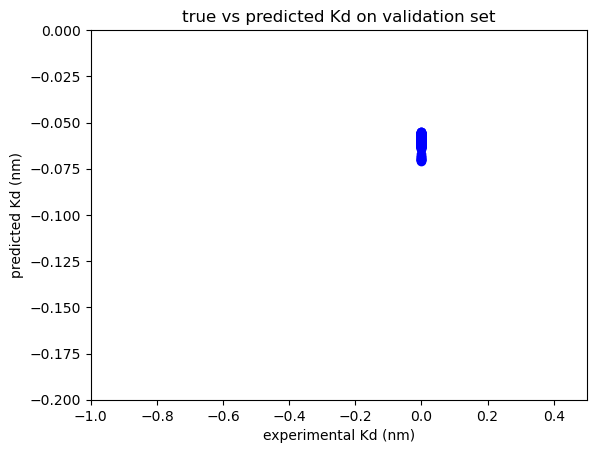

[[-0.0672474354505539], [-0.062493909150362015], [-0.0630592554807663], [-0.06208108738064766], [-0.06375889480113983], [-0.06083076074719429], [-0.06997321546077728], [-0.06238185241818428], [-0.06314454972743988], [-0.061779070645570755], [-0.061453867703676224], [-0.06186460331082344], [-0.0604545958340168], [-0.060579050332307816], [-0.06071798875927925], [-0.05986892059445381], [-0.05966620519757271], [-0.07092492282390594], [-0.07011543214321136], [-0.06837813556194305], [-0.06860367953777313], [-0.07030336558818817], [-0.06874261796474457], [-0.0696902722120285], [-0.06981776654720306], [-0.05845891311764717], [-0.06250779330730438], [-0.061176467686891556], [-0.05852733924984932], [-0.0578262098133564], [-0.05957113578915596], [-0.059380341321229935], [-0.05969243124127388], [-0.05954485014081001], [-0.0599699504673481], [-0.058689702302217484], [-0.05764882639050484], [-0.05720185115933418], [-0.059947241097688675], [-0.056634772568941116], [-0.05910848453640938], [-0.05803136

In [10]:
pred_file_path = './test_results/tform_mlp_model/finetune/cleaned-4b-data/preds_tform_mlp_1715572603.424339.pkl'
true_file_path = './test_results/tform_mlp_model/finetune/cleaned-4b-data/y_tform_mlp_1715572603.424339.pkl'
plot_pred_vs_true(pred_file_path, true_file_path, xlim=(-1.0, 0.5), ylim=(-0.2,0))

a = pk.load(open(pred_file_path, 'rb'))
print(a)

----
### t-SNE analysis

The transformer-based models should have learned relationships between the elements of the sequence.  See how this appears in t-SNE plots

In [ ]:
%autoreload
from torch.utils.data import DataLoader
from models.tform_mlp import TFormMLP_Lightning
from datasets.scFv_dataset import scFv_Dataset as dataset
import os
import yaml
import pytorch_lightning as pl
import torch

# Read the config
config_path = './config/tform_mlp_params.yaml'  
with open(config_path, 'r') as file:
    try:
        config = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)

model_config = config['model_params']
train_config = config['train_params']    
test_config = config['test_params']
print(model_config)
print(train_config)
print(test_config)

pl.seed_everything(config['seed'])



In [ ]:
#----------------------------------------------------------
# Load the dataset and dataloaders
#----------------------------------------------------------
test_data_path = './data/q_cleaned_4b_test_set.csv'
test_dataset = dataset(train_config, model_config['block_size'], test_data_path, regularize=False)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=train_config['batch_size'])

#----------------------------------------------------------
# Load pre-trained model
#----------------------------------------------------------
checkpoint_name = './lightning_logs/tform_mlp_model/cleaned-4b-data/version_2/checkpoints/epoch=135-step=4200-val_loss=0.10-loss=0.09.ckpt' 
model = TFormMLP_Lightning.load_from_checkpoint(checkpoint_path=checkpoint_name, model_config=model_config, config=train_config)

# register a forward hooks to pick out the output tensors for the attention blocks
feats = {} #an empty dictionary
def hook_func(m , inp ,op):
   feats['feat'] = op.detach()

model.model.transformer.encoders[5].attn_block.attend.register_forward_hook(hook_func)

In [ ]:
it = iter(test_loader)
batch = next(it)
# x, x2, x3, y, name = batch
x, y, name = batch
print('x shape:', x.shape, ', y shape:', y.shape)

# y_hat, trans_out = model(x.to(model.device), x2.to(model.device), x3.to(model.device))
y_hat, trans_out = model(x.to(model.device))
print('y_hat shape:', y_hat.shape, ', trans_out shape', trans_out.shape)

print('hook function results. feats[feat].shape:', feats['feat'].shape)

In [ ]:

import matplotlib.colors as colors

seq_idx = 100
heads = feats['feat']
head = heads[seq_idx,6,:,:].cpu()

# calc the mean-head over all 8
h1 = torch.sum(heads[10, :, :, :], dim=0)
nhead = (torch.nn.functional.normalize(h1, p=2.0, dim=1)).cpu()
print('nhead shape:', nhead.shape)

h1_colsum = torch.sum(h1, dim=0)
h1_colsum = torch.nn.functional.normalize(h1_colsum, p=2.0, dim=0)
print(h1_colsum.shape)
print(h1_colsum[28:112])
x = np.arange(0, len(h1_colsum)) #28, 112, 1)
y = h1_colsum.cpu().numpy()
plt.plot(x,y)

plt.figure(figsize=(10,10))
cmap = plt.get_cmap('viridis')
plt.imshow(nhead, cmap=cmap)  
xmin=0 #28
xmax=248 #112
xticks = torch.arange(xmin, xmax, 2).tolist()
plt.colorbar() 
plt.xlim(xmin, xmax)
plt.ylim(xmax, xmin)
# plt.xticks(xticks)

In [ ]:
from einops import repeat

print('trans_out shape:', trans_out.shape)
b, n, d = trans_out.shape
print('b:', b, ', n:', n, ', d:', d)

ctx_labels = torch.arange(0, model_config['block_size']+1)
print('ctx_labels shape:', ctx_labels.shape)


# Three types of tokens to distinguish in the tsne plot:
# 1. classifier token (used in the regression)
# 2. aa tokens in the CDR region
# 3. all others (including the CLS and PAD tokens)
ctx_cats = torch.ones_like(ctx_labels)  # label everything like it's a non-CDR aa group
ctx_cats[0] = 0  # the classifier token used in regression
ctx_cats[29:109] = 2  # the CDR region is aa residues 29-108

print(ctx_cats)

labels = ctx_cats.repeat(train_config['batch_size'])
print('labels shape:', labels.shape)

ctx_vectors = torch.reshape(trans_out, (trans_out.shape[0]*trans_out.shape[1], trans_out.shape[2]))
print('ctx_vectors shape', ctx_vectors.shape)

In [ ]:
# Look at just one sequence
#
num_seqs = 1
labels = ctx_cats.repeat(num_seqs)
print('labels shape:', labels.shape)

idx = 4
one_seq = trans_out[idx:idx+num_seqs]
print('shape one_seq:', one_seq.shape)
new_shape = one_seq.shape[0]*one_seq.shape[1]

ctx_vectors = one_seq
ctx_vectors = torch.reshape(one_seq, (one_seq.shape[0]*one_seq.shape[1], one_seq.shape[2]))
print('ctx_vectors shape', ctx_vectors.shape)

In [ ]:
from sklearn.manifold import TSNE
n_iter = 10000

# 2D
tsne = TSNE(n_components=2, random_state=config['seed'], metric="cosine", n_iter=n_iter, verbose=True)
x_tsne = tsne.fit_transform(ctx_vectors.detach().cpu().numpy())
print('x_tsne shape:', x_tsne.shape)
print(tsne.kl_divergence_)


In [ ]:
from pathlib import Path
path = Path('./misc_analysis/tSNE/tform_mlp/cleaned-4b-data')
path.mkdir(parents=True, exist_ok=True)

# pk.dump(x_tsne, open('./misc_analysis/tSNE/tform_mlp/cleaned-4b-data/tsne_x_10000iter_tform_mlp_v2.pkl', 'wb'))

# x_tsne = pk.load(open('./misc_analysis/tSNE/tform_mlp_v2/tsne_x_10000iter_tform_mlp_v2.pkl', 'rb'))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create an array with three colors
# colors = ["#FF0000", "#00FF00", "#0000FF", "#000000"] # rgb, black
colors = ["#0000FF", "#A0A0A0", "#FF0000"] # rgb
# Set custom color palette
my_palette = sns.color_palette(colors)
sns.set_palette(my_palette)

fig, ax = plt.subplots(figsize=(10, 8))
x_all = x_tsne[:, 0] 
y_all = x_tsne[:, 1] 
cat_all = labels     
plt.title('t-SNE of transformer model output')  
ax.set_xlabel("t-SNE y")
ax.set_ylabel("t-SNE x")
p = sns.scatterplot(x=x_all, y=y_all, alpha=0.6, ax=ax, palette=sns.color_palette(my_palette), hue=labels, legend=True)

# title
p.legend_.set_title('Token type')
new_labels = ['regression token', 'aa: non-CDR', 'aa: CDR region (29-108)']
for t, l in zip(p.legend_.texts, new_labels):
    t.set_text(l)


In [ ]:
# Set the color palette
sns.set_palette(sns.color_palette("Paired"))
# Plot the data, specifying a different color for data points in
# each of the day categories (weekday and weekend)
ax = sns.scatterplot(x='day', y='miles_walked', data=dataset, hue='day_category')
# Customize the axes and title
ax.set_title("Miles walked")
ax.set_xlabel("day")
ax.set_ylabel("total miles")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

----
## Analysis of output of attention blocks to see the interactions

### (also, see the BertViz tool:  https://github.com/jessevig/bertviz)

In [ ]:
%autoreload
from torch.utils.data import DataLoader
from models.tform_mlp_v2 import TFormMLP_Lightning_v2
from datasets.scFv_dataset_v2 import scFv_Dataset_v2 as dataset
import os
import yaml
import pytorch_lightning as pl
import torch

# Read the config
config_path = './config/tform_mlp_params.yaml'  
with open(config_path, 'r') as file:
    try:
        config = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)

model_config = config['model_params']
train_config = config['train_params']    
test_config = config['test_params']
print(model_config)
print(train_config)
print(test_config)

pl.seed_everything(config['seed'])



In [ ]:
#----------------------------------------------------------
# Load the dataset and dataloaders
#----------------------------------------------------------
test_data_path = './data/q_cleaned_4b_test_set.csv'
test_dataset = dataset(train_config, model_config['block_size'], test_data_path, regularize=False)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=train_config['batch_size'])

#----------------------------------------------------------
# Load pre-trained model
#----------------------------------------------------------
checkpoint_name = './lightning_logs/tform_mlp_model/cleaned-4-data/trained/checkpoints/epoch=316-step=9800-val_loss=0.11-loss=0.05.ckpt' 
model = TFormMLP_Lightning_v2.load_from_checkpoint(checkpoint_path=checkpoint_name, model_config=model_config, config=train_config)


it = iter(test_loader)
batch = next(it)
x, y, name = batch
print('x shape:', x.shape, ', y shape:', y.shape)

y_hat, trans_out = model(x.to(model.device))
print('y_hat shape:', y_hat.shape, ', trans_out shape', trans_out.shape)

In [ ]:
#
# Use forward hooks to pick out the output tensors for the attention blocks
#

feats = {} #an empty dictionary
def hook_func(m , inp ,op):
   feats['feat'] = op.detach()

# it = iter(test_loader)
# batch = next(it)
# x, x2, x3, y, name = batch
y_hat, trans_out = model(x.to(model.device), x2.to(model.device), x3.to(model.device))

print(feats['feat'].shape)

In [ ]:
# Register hooks to pick outputs from specific layers in model